# Einführung

Machine Learning (ML) als Teilgebiet der Künstlichen Intelligenz hat in den letzten Jahren aufgrund zahlreicher Durchbrüche im Bereich Deep Learning zu weitreichenden Disruptionen in unserem Leben geführt. Die Fortschritte bieten insbesondere Data Scientists die Möglichkeit, rießige Datenmengen effizient zu nutzen, um z.B. spannende Analysen für Prozessoptimierung, Forecasting oder Mustererkennung zu entwickeln. Bereits mit wenig Wissen lassen sich diese Technologien gewinnbringend nutzen und besitzen daher ein enormes Potential für die Zukunft.
<br>
Dieses Tutorial setzt voraus, dass Sie grundlegendes Wissen im Bereich Machine Learning und 
Kenntnisse in Python - speziell [`Numpy`](https://numpy.org/), [`Pandas`](https://pandas.pydata.org/) und [`Matplotlib`](https://matplotlib.org/) - besitzen. Diese Frameworks wurden bereits im Dokument 5. Einfuehrung_in_die_Data_Science näher erleutert.<br><br>
Ziel des Tutorials ist es, Standards für die Vorgehensweise beim Entwickeln von Machine Learning Projekten zu setzen und ein "Cheat-Sheet" bei der intelligenten Programmierung mit Python - von Preprocessing bis zum Trainieren und Testen der Anwendung - zu sein.
<br><br>
Das Tutorial ist folgendermaßen gegliedert:
1. Data Selection
2. Feature Engineering
3. Feature Selection
4. Hyperparameter
5. Backtests


In diesem Tutorial verwenden wir [`Scikit-Learn`](https://scikit-learn.org/). Das Framework ist sehr einfach zu nutzen, trotzdem enthält es effiziente Machine Learning Algorithmen. Es wurde von David Cournapeau 2007 entwickelt und wird aktuell von einem Forscherteam des French Institute of Research in Computer Science and Automation (Inria) geführt.

# 1. Data Selection

Data Selection soll für einen sauberen und aussagekräftigen Datensatz sorgen, bei dem keine falschen oder überflüssigen Informationen enthalten sind. Vor allem beim Arbeiten mit realen Daten sollte man sich vier Fragen stellen:

### Wie sieht mein Datensatz aus?

 Folgendes ist zu beachten:
* Wir verwenden stets CSV-Dateien.
* Die Inhalte werden mit `Pandas` ausgelesen und als `Pandas.DataFrame` gespeichert. Dafür kann der unten stehende Befehl verwendet werden. Die Funktion gibt ein Dataframe Objekt zurück, das die gesamten Daten des Dokuments enthält.
* Um die obersten Spalten des gespeicherte DataFrame auszugeben, nutzt man dann den Befehl `df.head()`.

In [116]:
import pandas as pd
import numpy as np

housing = pd.read_csv("../data/housing.csv", delimiter=",", encoding='latin-1', index_col=0)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,-3.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


* Die `info()`-Methode liefert eine kurze Beschreibung der Daten, genauer gesagt die Anzahl der Reihen, den Attributstyp und die Zahl der Werte, die nicht null sind. Beachten Sie, dass die Spalte `total_bedrooms` nur 20433 Einträge besitzt, um die fehlenden 7 Einträge kümmern wir uns später.

In [117]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


* Wenn Spalten sich wiederholende Werte enthalten, also <b>kategorische Variablen</b>, dann kann man die einzelen Werte mit Häufigkeit über die Methode `value_counts()` erhalten.

In [118]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

* Mit der Methode `describe()` wird eine Zusammenfassung der numerischen Werte erstellt. Fehlende Zellen werden ignoriert. `std` liefert die Standardabweichung, `25%`, `50%`, `75%` zeigen die Quantile an. 

In [119]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.636822,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.586434,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,-3.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* Histogramme ermöglichen einen Überblick über die Verteilung der Werte. `hist()` wird über `Matplotlib` realisiert.

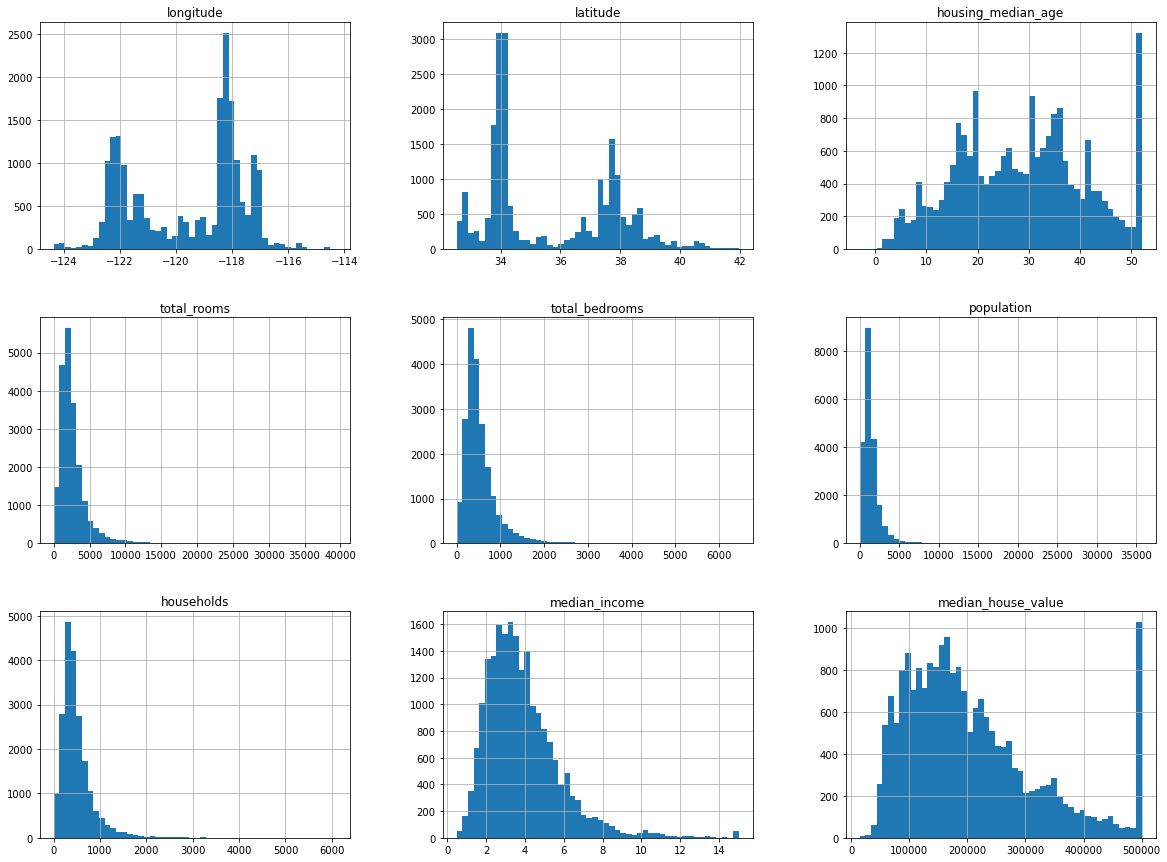

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Was ist meine Zielgröße?

An dieser Stelle soll das Ergebnis der Datenanalyse näher spezifiziert werden. Insbesondere wird festgelegt, wie die Zielgröße formatiert ist, also welchen Variablentyp das Ergebnis besitzen soll. In gewissen Projekten ist es sinnvoll, die Zielvariable zu [logarithmieren](https://de.wikipedia.org/wiki/Logarithmische_Darstellung), was viele Vorteile mit sich bringt. Ist am Ende des Projekts eine binäre Entscheidung zu treffen (z.B. kaufen/ nicht kaufen), dann macht ein rein numerisches Verfahren keinen Sinn, sondern ein Verfahren, dass mit kategorischen Targets umgehen kann.

### Sind die Daten fehlerhaft?

Enthalten Trainingsdaten viele Fehler und Ausreißer (engl. Outliers), fällt es dem System schwierig, die zugrunde liegenden Patterns zu erfassen, worunter die Performance der Anwendung leiden könnte. Daher macht es oft Sinn, sich Zeit zu nehmen, um Trainingsdaten mit schlechter Qualität zu bereinigen. Unter anderem können Fehler manuell gefixed oder Ausreißer nach sinnvollen Regeln entfernt werden.
<br><br>
Ihnen ist bestimmt schon aufgefallen, dass der Datensatz einen negativen Wert in der Spalte `housing_median_age` enthält. Wir können entweder die Zeile löschen (#1) oder den Wert durch einen anderen ersetzen (#2):

In [121]:
housing = housing[housing["housing_median_age"] > 0] #1
housing.loc[housing['housing_median_age'] < 0] = 0 #2

Fehlende Werte können auch ganz einfach mit `dropna()` gelöscht werden.

In [122]:
housing = housing.dropna(subset = ['total_bedrooms']) #löscht NaN-Werte aus spezifische Series
housing = housing.dropna() #löscht alle NaN-Werte des DataFrames
housing.head() #Veranschaulichung des Ergebnisses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


### Kann ich die fehlenden Werte ersetzen?

Nachdem der Datensatz jetzt saubere Daten enthält, kann es für das Modell und besonders das Training sinnvoll sein, einzelne Spalten zu interpolieren. Hierbei unterscheidet man zwischen kategorischen und numerischen Spalten. 

* <b>kategorisch:</b><br>
Kategorische Spalten werden meistens mit dem Wert aufgefüllt, der am häufigsten auftritt. Mit dem `SimpleImputer` von `Scikit-Learn` können wir verschiedene Strategien wählen, mit denen wir fehlende Zellen ausfüllen möchten. In diesem Beispiel werden die fehlenden Lücken mit dem am häufigsten auftretenden Wert ausgefüllt.

In [123]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
housing_cat = housing[["ocean_proximity"]]
imputer.fit(housing_cat) #in statistics-Variable speichern
print(imputer.statistics_)

['<1H OCEAN']


Den häufigsten Wert einer Spalte erhält man durch `.mode`

In [124]:
housing["ocean_proximity"].mode()

0    <1H OCEAN
dtype: object

Dasselbe lässt sich auch aggregiert umsetzen. Möchte man z.B. den häufigsten Wert der Spalte `ocean_proximity`, bei dem der Wert von `total_bedrooms` größer gleich 1000 ist, mit *NEAR BAY* auffüllen, nutzt man die Methode `fillna()`. Auf die gleiche Weise können auch numerische Werte ersetzt werden.

In [125]:
housing["ocean_proximity"] = housing["ocean_proximity"].fillna(
    pd.Series(np.where(housing["total_bedrooms"] >= 1000, 'NEAR BAY', housing["ocean_proximity"].mode())))

Will man die Spalte mit dem Wert auffüllen, der am häufigsten auftritt, wenn `total_bedrooms` größer gleich 1000 ist, kann ebenfalls die Methode `fillna()` verwenden.

In [126]:
housing["ocean_proximity"] = housing["ocean_proximity"].fillna(
    housing[housing["total_bedrooms"]>=1000]["total_bedrooms"].mode())

Eine weitere Möglichkeit, fehlende Werte zu ersetzen, ist die Methoden [`DataFrame.sort_values()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)  mit [`GroupBy.ffill()` ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.ffill.html) zu kombinieren. Hier werden die Werte der Spalte `ocean_proximity` nach den Einträgen in `total_bedrooms` sortiert und mit `GroupBy.ffill()` wird ein *forward-fill* realisiert.

In [127]:
housing['ocean_proximity'] = housing.sort_values('ocean_proximity').groupby(
    'total_bedrooms')['ocean_proximity'].ffill()

* <b>numerisch:</b><br><br>

* Möglichkeit 1: Werte händisch mit Median auffüllen mit `fillna()`
* Möglichkeit 2: `SimpleImputer`
* Möglichkeit 3: Interpolation mit `Pandas`, z.B. *Spline-Interpolation*

In [128]:
# Möglichkeit 1
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)

# Möglichkeit 2
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop(["ocean_proximity"], axis = 1) #Median kann nur über numerische Werte gebildet werden
imputer.fit(housing_num) #in statistics-Variable speichern

#jetzt können wir den "trainierten" imputer die fehlenden Werte ersetzen lassen
X = imputer.transform(housing_num)
#in ein df zurückführen
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

# Möglichkeit 3
housing_num_interpolated = housing_num.interpolate(method='spline', order=2)

# 2. Feature Engineering

In diesem Schritt sollen neue Informationen aus den Daten generiert werden, die so nicht in das Modell einwirken können. Darüber hinaus sollen an dieser Stelle, wenn möglich, externe Daten eingebunden werden. Mehr Informationen dazu finden sich im Python Tutorial unter *5._Einführung_in_die_Data_Science*.

* Kategorische Variablen können mit numerischen Daten über den `OrdinalEncoder` ersetzt werden.

In [129]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

* Binäre Variablen werden mit dem `OneHotEncoder` realisiert.<br>
Beachte: Output ist eine `SciPy` sparse matrix

In [130]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(type(housing_cat_1hot))
print(housing_cat_1hot.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


### Transformation Pipelines

`Scikit-Learn` bietet die `Pipeline`-Klasse, um Data Transformation zu erleichtern. Der `Pipeline`-Konstruktor nimmt eine Liste an Namen/estimator-Paaren und definiert dadurch eine Sequenz an Befehlen. Alle bis auf den letzten estimator müssen transformer sein (also eine `fit_transform()`-Methode enthalten). Hier ist eine kleine Pipeline für die numerischen Attribute, die sequenziell `fit_transform()` bei allen transformers aufruft:

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.32740481,  1.05177003,  0.98231289, ..., -0.97685813,
         2.34520114,  2.12889421],
       [-1.32241352,  1.04240801, -0.60615559, ...,  1.67031784,
         2.33266988,  1.31369449],
       [-1.3323961 ,  1.037727  ,  1.85597056, ..., -0.84345302,
         1.78297944,  1.25825051],
       ...,
       [-0.82328455,  1.77732648, -0.92384929, ..., -0.17381167,
        -1.14312174, -0.99242841],
       [-0.87319745,  1.77732648, -0.84442587, ..., -0.39353774,
        -1.05508703, -1.05826814],
       [-0.83326713,  1.74924043, -1.00327272, ...,  0.07991963,
        -0.78055772, -1.01755147]])

Bisher haben wir bereits kategorische Spalte und numerische Spalten separat behandelt (2. Feature Engineering). Der `ColumnTransformer` ermöglicht uns die einzelnen Transformationen in einem transformer zu vollziehen. Der Konstruktor benötigt eine Liste an Tripeln, wobei jedes Tripel aus einem Namen, einem transformer und einer Liste an Spaltennamen besteht.

In [132]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) #Liste numerischer Spalten
cat_attribs = ["ocean_proximity"] #Liste kategorischer Spalten

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.32740481,  1.05177003,  0.98231289, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32241352,  1.04240801, -0.60615559, ...,  0.        ,
         1.        ,  0.        ],
       [-1.3323961 ,  1.037727  ,  1.85597056, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.82328455,  1.77732648, -0.92384929, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87319745,  1.77732648, -0.84442587, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83326713,  1.74924043, -1.00327272, ...,  0.        ,
         0.        ,  0.        ]])

# 3. Feature Selection

Nicht jede Einflussgröße ist wichtig, daher werden in diesem Schritt die wichtigen Features (<b>[Feature Importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/)</b>) identifiziert.<br>
Sind bestimmte Spalten nicht weiter relevant, kann man sie mit `drop()` oder `del` löschen.

In [133]:
housing_test = housing.copy()
housing_test.drop('households', axis =1, inplace = True)
del housing_test['longitude']
print(housing.columns)
print(housing_test.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Index(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')


Die Klassen im Modul [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/feature_selection.html) können zur Feature Selection genutzt werden. Das verbessert die Genauigkeit des Schätzers und sorgt für bessere Performance bei großen Datenmengen. Die Klasse `VarianceThreshold` ist eine einfache Baseline zum Selektieren, bei der alle Features mit einer Varianz unter der gewählten Schwelle aussortiert werden.

In [134]:
from sklearn.feature_selection import VarianceThreshold
housing_selected = VarianceThreshold(threshold=(.8 * (1 - .8)))
housing_selected.fit_transform(housing_num_tr)

array([[-1.32740481,  1.05177003,  0.98231289, ..., -0.97685813,
         2.34520114,  2.12889421],
       [-1.32241352,  1.04240801, -0.60615559, ...,  1.67031784,
         2.33266988,  1.31369449],
       [-1.3323961 ,  1.037727  ,  1.85597056, ..., -0.84345302,
         1.78297944,  1.25825051],
       ...,
       [-0.82328455,  1.77732648, -0.92384929, ..., -0.17381167,
        -1.14312174, -0.99242841],
       [-0.87319745,  1.77732648, -0.84442587, ..., -0.39353774,
        -1.05508703, -1.05826814],
       [-0.83326713,  1.74924043, -1.00327272, ...,  0.07991963,
        -0.78055772, -1.01755147]])

# 4. Hyperparameter

Nachdem wir die Daten bereinigt haben, verwenden wir eine `LinearRegression` und den `DecisionTreeRegressor`, um auf dem Datensatz zu trainieren und zu evaluieren.

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

housing_labels = housing["median_house_value"].copy()

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
print(some_data)
print(some_labels)
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", "\n",lin_reg.predict(some_data_prepared),"\n",tree_reg.predict(some_data_prepared))
print("Labels:",list(some_labels))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
0    452600.0
1    358500.0
2    352100.0
4    342200.0
5    269700.0
Name:

An dieser Stelle unterscheidet man, ob der Datensatz aus zusammenhängende Daten, z.B. Zeitreihen, besteht, oder nicht.  Ein Hauptgrund für den Split in Trainingsdaten und Testdaten ist [<b>overfitting</b>](https://elitedatascience.com/overfitting-in-machine-learning).
* <b>kein Zusammenhang:</b><br>
Die unten stehende Funktion mischt den Datensatz zufällig durch und teilt ihn in einen Traings- und Validationdatensatz entsprechend der gewünschten ratio. Hier müsste man nun das Modell gegen das Trainingsset trainieren und dann gegen das Validationsset evaluieren. 

In [ ]:
def split_train_test_shuffle(data,test_ratio):
    shuffeled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test_shuffle(housing,0.2)

Um den Datensatz in kleinere training sets und einen validation set zu splitten, bietet `Scikit-Learn` das Feature `K-fold cross-validation`. Der folgende Code teilt den Datensatz zufällig in 10 disjunkte subsets, sogenannte `folds`. Dann wird das Modell mit 9 folds trainiert und mit einem fold wird evaluiert. 

In [136]:
from sklearn.model_selection import cross_val_score
import numpy as np
result = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
x = np.sqrt(-result)

def display_result(result):
    print("Result:", result)
    print("Mean:", result.mean())
    print("Standard deviation:", result.std())
    
display_result(x)

Result: [ 68.74610823 131.76878879  97.509368    61.74965642  99.92655159
  67.54197767  74.92858404  61.47159287 120.51041717  67.65059523]
Mean: 85.18036400119863
Standard deviation: 24.27517554110687


Die Funktion `sklearn.model_selection.train_test_split()` teilt das Array oder die Matrix in zufällige Trainings-und Testsubsets auf.

In [137]:
from sklearn.model_selection import train_test_split
housing_labels_train, housing_labels_test = train_test_split(housing_labels, test_size=0.2)
print(housing_labels_train, housing_labels_test)

18586    192200.0
9925     258900.0
12834     94900.0
15768    476900.0
19789     66000.0
           ...   
8795     500001.0
14548    370500.0
13356    175400.0
577      412500.0
16805    246700.0
Name: median_house_value, Length: 16345, dtype: float64 6316     302400.0
4612     300000.0
20099     79400.0
2680      63700.0
9983     300000.0
           ...   
3616     153900.0
12917    195400.0
268      164400.0
1102      67500.0
16591    208100.0
Name: median_house_value, Length: 4087, dtype: float64


* <b>Zusammenhang:</b><br>
Den Datensatz kann man über eine simple, selbst definierte Funktion ohne Permutationen aufsplitten. Dafür wurde die oben stehende Funktion `split_train_test_shuffle()` umgeschrieben.

In [138]:
def split_train_test(data,test_ratio):
    test_set_size = int(len(data)*test_ratio)
    return data.iloc[:test_set_size], data.iloc[test_set_size:]


train_set, test_set = split_train_test(housing,0.2)

Eine bessere Alternative ist, dass *cross-validation* Feature [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) für zusammenhängenden Daten zu nutzen. Hier wird der Datensatz wieder in 10 aufeinander folgende *folds* aufgetrennt (ohne Permutation/shuffle als default). Jeder *fold* wird dann einmal als validation set genutzt, während die übrigen 9 das trainings set bilden. Die unten stehende Grafik dient zur Veranschaulichung des Splits bei 4 *folds*. 

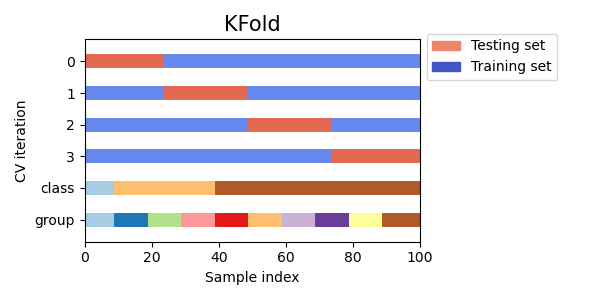

In [139]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
X = housing_labels 
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]

TRAIN: [ 2044  2045  2046 ... 20429 20430 20431] TEST: [   0    1    2 ... 2041 2042 2043]
TRAIN: [    0     1     2 ... 20429 20430 20431] TEST: [2044 2045 2046 ... 4085 4086 4087]
TRAIN: [    0     1     2 ... 20429 20430 20431] TEST: [4088 4089 4090 ... 6128 6129 6130]
TRAIN: [    0     1     2 ... 20429 20430 20431] TEST: [6131 6132 6133 ... 8171 8172 8173]
TRAIN: [    0     1     2 ... 20429 20430 20431] TEST: [ 8174  8175  8176 ... 10214 10215 10216]
TRAIN: [    0     1     2 ... 20429 20430 20431] TEST: [10217 10218 10219 ... 12257 12258 12259]
TRAIN: [    0     1     2 ... 20429 20430 20431] TEST: [12260 12261 12262 ... 14300 14301 14302]
TRAIN: [    0     1     2 ... 20429 20430 20431] TEST: [14303 14304 14305 ... 16343 16344 16345]
TRAIN: [    0     1     2 ... 20429 20430 20431] TEST: [16346 16347 16348 ... 18386 18387 18388]
TRAIN: [    0     1     2 ... 18386 18387 18388] TEST: [18389 18390 18391 ... 20429 20430 20431]


Beachten Sie, dass bei Zeitreihen dadurch auch ältere Daten mit aktuelleren Daten trainiert werden. Eine Funktion, mit der man dieses Problem umgehen kann, nennt sich [`sklearn.model_selection.TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). Diese Anwendung ist eine Variation von `KFold`, bei dem in jedem Split die Testindices größer als zuvor sind und immer größer als die Trainingsindices sind. Im k-ten Split werden die ersten k *folds* als trainings set und der (k+1)-te *fold* als test set zurückgegeben. Die unten stehende Grafik dient zur Veranschaulichung des Splits bei 4 *folds*. Weitere Veranschaulichungen zu anderen Splits von `Scikit-Learn` finden Sie [hier](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py).

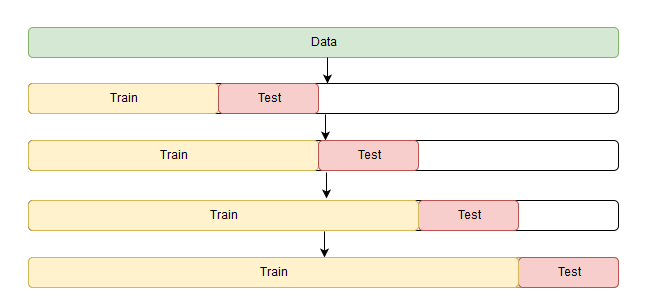

In [140]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index] 

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


### Fine-Tuning mit `Grid Search`

`Scikit Learn`'s `Grid Search` ermöglicht uns, Hyperparameteroptimierung durchzuführen. Man übergibt der Funktion Hyperparameter, die man bestimmen möchte, und Werte, die man als Hyperparameter ausprobieren möchte. Dann nutzt die Funktion *cross-validation*, um mögliche Kombinationen zu evaluieren. Als Beispiel verwenden wir dafür einen `RandomForestRegressor`, dessen Hyperparameter wir optimieren möchten.

In [141]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [142]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Die Variable `param_grid` sagt `Scikit-Learn`, dass alle 3x4 = 12 Kombinationen von `n_estimators` und `max_features` Hyperparametern im ersten *dict* evaluiert werden sollen, dann werden alle 2x4 = 6 Kombinationen von Hyperparametern im zweiten *dict* ausgetestet, aber diesmal mit dem *bootstrap* Hyperparameter `False`, anstelle von *default* `True`. Dadurch werden 12+6 = 18 Kombinationen von Hyperparamtern für den `RandomForestRegressor` ausgetestet. Anschließend trainieren wir jedes Modell 5 mal; das bedeutet, dass ingesamt 18x5 = 90 Runden trainiert wird. Man erhält die Ergebnisse der Evaluation und die beste Kombination an Parametern wie folgt:

In [143]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

41575.16081022382 {'max_features': 2, 'n_estimators': 3}
30072.74665949688 {'max_features': 2, 'n_estimators': 10}
27929.849585580527 {'max_features': 2, 'n_estimators': 30}
20218.553657568704 {'max_features': 4, 'n_estimators': 3}
13508.892548652342 {'max_features': 4, 'n_estimators': 10}
10951.580445275862 {'max_features': 4, 'n_estimators': 30}
10703.498504113837 {'max_features': 6, 'n_estimators': 3}
5438.097956885715 {'max_features': 6, 'n_estimators': 10}
4663.656438337039 {'max_features': 6, 'n_estimators': 30}
5467.629668400616 {'max_features': 8, 'n_estimators': 3}
3020.949379973575 {'max_features': 8, 'n_estimators': 10}
1727.109242008895 {'max_features': 8, 'n_estimators': 30}
42353.48243077762 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
28688.07915724774 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
25933.61776394167 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
17267.76332881727 {'bootstrap': False, 'max_features': 3, 'n_estimators

Ferner erhält man auch den `best_estimator` und die beste Parameterkombination direkt:

In [144]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)

RandomForestRegressor(max_features=8, n_estimators=30)
{'max_features': 8, 'n_estimators': 30}


### Randomisierte Suche

Der `Grid Search`-Ansatz ist gut, wenn es darum geht, relativ wenige Kombinationen auszuprobieren, aber wenn Wertebereich für die Hyperparamter groß ist, ist `RandomizedSearchCV` von Vorteil. Diese Klasse funktioniert ähnlich wie `GridSearchCV`, allerdings testet es nicht alle Kombinationen, sondern evaluiert eine bestimmte Zahl an zufälligen Kombinationen, indem es zufällige Werte jedes Hyperparamters für jeden Iteration auswählt.

# 5. Backtests

Beim Backtesting wird das Modell mit historischen Daten evaluiert. Dafür können unterschiedliche Fehlermaße verwendet werden. Fehlermaße sind wichtig zur Einschätzung der Güte eines Modells. 
* Um den `RMSE` ([Root-mean-square error](https://en.wikipedia.org/wiki/Root-mean-square_deviation), Wurzel aus dem mittleren quatratischen Fehler) des Regressionsmodells zu bestimmen, kann man die Funktion `mean_squared_error()` verwenden:

In [145]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions) #liefert mean-square-error, kurz MSE
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7.579592886754806e-10

* Den `mean_absolute_percentage_error`, kurz `MAPE`, kann man über diese Funktion bestimmen: 

In [146]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
lin_mape = mean_absolute_percentage_error(housing_labels, housing_predictions)
lin_mape

4.385285018910247e-13

* Ergebnisse für den `RandomForestRegressor` oder den `DecisionTreeRegressor` erhält man analog. 

In [147]:
#RandomForestRegressor
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_mape = mean_absolute_percentage_error(housing_labels, housing_predictions)
print(forest_mape)

# DecisionTreeRegressor
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

tree_mape = mean_absolute_percentage_error(housing_labels, housing_predictions)
print(tree_mape)

18.47519913506921
0.004225668537066166
0.0
0.0
